In [2]:
import pickle

In [3]:
def load(gossip_count, gossip_segments, pga_frequency):
    x = pickle.load(open(f'./results-{gossip_count}-{gossip_segments}-{pga_frequency}.pkl', 'rb'))
    losses = [y for _,y in x.losses_distributed]
    comms = [y for _,y in x.metrics_distributed_fit['communication']]
    acc = [y for _,y in x.metrics_distributed['accuracy']]
    return losses, comms, acc

range(0, 2000, 20)


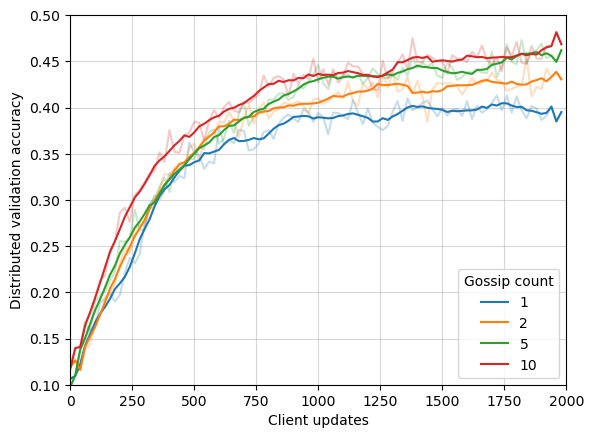

In [50]:
import matplotlib.pyplot as plt

# def ema(x, alpha=1):
#     # exponential moving average
#     y = [x[0]]
#     for i in range(1, len(x)):
#         y.append(alpha*x[i] + (1-alpha)*y[i-1])
#     return y

import matplotlib.pyplot as plt

# def ema(x, alpha=0.2):
#     # exponential moving average
#     y = [x[0]]
#     for i in range(1, len(x)):
#         y.append(alpha*x[i] + (1-alpha)*y[i-1])
#     return y

def ema(x):
    # 7-point moving average
    # y = x[:3]
    # for i in range(3, len(x)-3):
    #     y.append(sum(x[i-3:i+4])/7)
    # y.append(x[-3])
    # y.append(x[-2])
    # y.append(x[-1])
    # return y


    # # 5-point moving average
    y = x[:2]
    for i in range(2, len(x)-2):
        y.append(sum(x[i-2:i+3])/5)
    y.append(x[-2])
    y.append(x[-1])
    return y


x=range(0, 2000, 20)
print(x)

plt.plot(x,load(1, 1, 0)[2], alpha=0.25, color='tab:blue')
plt.plot(x,load(2, 1, 0)[2], alpha=0.25, color='tab:orange')
plt.plot(x,load(5, 1, 0)[2], alpha=0.25, color='tab:green')
plt.plot(x,load(10, 1, 0)[2], alpha=0.25, color='tab:red')

plt.plot(x,ema(load(1, 1, 0)[2]), label='1', color='tab:blue')
plt.plot(x,ema(load(2, 1, 0)[2]), label='2', color='tab:orange')
plt.plot(x,ema(load(5, 1, 0)[2]), label='5', color='tab:green')
plt.plot(x,ema(load(10, 1, 0)[2]), label='10', color='tab:red')
plt.ylabel('Distributed validation accuracy')
plt.xlabel('Client updates')
plt.xlim(0, 2000)
plt.ylim(0.1, 0.5)
plt.grid(alpha=0.5)
plt.legend(title="Gossip count")

range(0, 2000, 20)


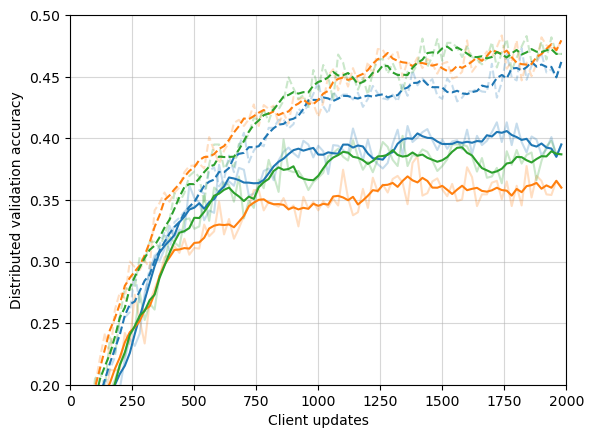

In [47]:
import matplotlib.pyplot as plt

# def ema(x, alpha=0.2):
#     # exponential moving average
#     y = [x[0]]
#     for i in range(1, len(x)):
#         y.append(alpha*x[i] + (1-alpha)*y[i-1])
#     return y

def ema(x):
    # 5-point moving average
    y = x[:2]
    for i in range(2, len(x)-2):
        y.append(sum(x[i-2:i+3])/5)
    y.append(x[-2])
    y.append(x[-1])
    return y

x=range(0, 2000, 20)
print(x)
alpha=0.25
plt.plot(x,load(1, 1, 0)[2], label='m=1, s=1', color='tab:blue', alpha=alpha)
plt.plot(x,load(1, 3, 0)[2], label='m=1, s=3', color='tab:orange', alpha=alpha)
plt.plot(x,load(1, 10, 0)[2], label='m=1, s=10', color='tab:green', alpha=alpha)

plt.plot(x,load(5, 1, 0)[2], label='m=10, s=1', color='tab:blue', linestyle='dashed', alpha=alpha)
plt.plot(x,load(5, 3, 0)[2], label='m=10, s=3', color='tab:orange', linestyle='dashed', alpha=alpha)
plt.plot(x,load(5, 10, 0)[2], label='m=10, s=10', color='tab:green', linestyle='dashed', alpha=alpha)

plt.plot(x,ema(load(1, 1, 0)[2]), label='m=1, s=1', color='tab:blue')
plt.plot(x,ema(load(1, 3, 0)[2]), label='m=1, s=3', color='tab:orange')
plt.plot(x,ema(load(1, 10, 0)[2]), label='m=1, s=10', color='tab:green')

plt.plot(x,ema(load(5, 1, 0)[2]), label='m=10, s=1', color='tab:blue', linestyle='dashed')
plt.plot(x,ema(load(5, 3, 0)[2]), label='m=10, s=3', color='tab:orange', linestyle='dashed')
plt.plot(x,ema(load(5, 10, 0)[2]), label='m=10, s=10', color='tab:green', linestyle='dashed')
plt.ylabel('Distributed validation accuracy')
plt.xlabel('Client updates')
plt.xlim(0, 2000)
plt.ylim(0.2, 0.5)
plt.grid(alpha=0.5)
# plt.legend()